Step 1: Load the Actual Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
product_level = pd.read_excel('Topic_sentiment_product_level_table_FINAL.xlsx', sheet_name=None)
sentence_level = pd.read_excel('Topic_sentiment_sentence_level_table.xlsx', sheet_name=None)

In [8]:
# Let's check the brand information
print("=== BRAND INFORMATION ===\n")

brand_list = sentence_level['Product & Brand List']
print("Brand List Structure:")
print(f"Shape: {brand_list.shape}")
print(f"Columns: {brand_list.columns.tolist()}")
print(f"\nBrand List Content:")
display(brand_list)
product_brand_df=brand_list 

=== BRAND INFORMATION ===

Brand List Structure:
Shape: (43, 6)
Columns: ['42 Products in total with 400 review each. ', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Total 9 brands']

Brand List Content:


,42 Products in total with 400 review each.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Total 9 brands
0,secondary_category,brand_name,product_name_cleaned,n_reviews,NaN,brand_name
1,Cleansers,CLINIQUE,Acne Solutions Cleansing Foam,400,NaN,CLINIQUE
2,Cleansers,CLINIQUE,All About Clean Liquid Facial Soap,400,NaN,Drunk Elephant
3,Cleansers,CLINIQUE,Clarifying Lotion 2,400,NaN,Farmacy
4,Cleansers,CLINIQUE,Exfoliating Face Scrub,400,NaN,First Aid Beauty
5,Cleansers,CLINIQUE,Take The Day Off Cleansing Balm Makeup Remover,400,NaN,Tatcha
6,Cleansers,Farmacy,Clean Bee Ultra Gentle Facial Cleanser,400,NaN,The Ordinary
7,Cleansers,Farmacy,Clearly Clean Makeup Removing Cleansing Balm,400,NaN,fresh
8,Cleansers,Farmacy,Deep Sweep 2% BHA Pore Cleaning Toner with Mor...,400,NaN,belif
9,Cleansers,Farmacy,Green Clean Makeup Meltaway Cleansing Balm Lim...,400,NaN,Dr. Dennis Gross Skincare


Step 2: Set Up the Data for Analysis

In [11]:
# Fix the product brand list - data starts from row 1
product_brand_df_clean = product_brand_df.iloc[1:].copy()
product_brand_df_clean.columns = ['secondary_category', 'brand_name', 'product_name_cleaned', 'n_reviews', 'Unnamed_4', 'brand_list']
product_brand_df_clean = product_brand_df_clean.reset_index(drop=True)

print("=== CLEANED PRODUCT BRAND LIST ===")
print(f"Products in brand list: {len(product_brand_df_clean)}")
display(product_brand_df_clean.head(10))

# Now let's continue with the analysis
product_df= pd.read_excel(
    'Topic_sentiment_product_level_table_FINAL.xlsx',
    sheet_name="Topic sentiment product level"
)

sentence_df= pd.read_excel(
    'Topic_sentiment_sentence_level_table.xlsx',
    sheet_name="Topic sentiment sentence level"
)

topic_df= pd.read_excel(
    'Topic_sentiment_sentence_level_table.xlsx',
    sheet_name="Topic List"
)
print("=== CONTINUING ANALYSIS ===")
print(f"Product Level: {product_df.shape} rows, {product_df['product_name_cleaned'].nunique()} unique products")
print(f"Sentence Level: {sentence_df.shape} rows")
print(f"Total subtopics: {topic_df['Subtopic Name'].nunique()}")

# Display the topic structure
print("\n=== TOPIC HIERARCHY ===")
display(topic_df)

=== CLEANED PRODUCT BRAND LIST ===
Products in brand list: 42


,secondary_category,brand_name,product_name_cleaned,n_reviews,Unnamed_4,brand_list
0,Cleansers,CLINIQUE,Acne Solutions Cleansing Foam,400,NaN,CLINIQUE
1,Cleansers,CLINIQUE,All About Clean Liquid Facial Soap,400,NaN,Drunk Elephant
2,Cleansers,CLINIQUE,Clarifying Lotion 2,400,NaN,Farmacy
3,Cleansers,CLINIQUE,Exfoliating Face Scrub,400,NaN,First Aid Beauty
4,Cleansers,CLINIQUE,Take The Day Off Cleansing Balm Makeup Remover,400,NaN,Tatcha
5,Cleansers,Farmacy,Clean Bee Ultra Gentle Facial Cleanser,400,NaN,The Ordinary
6,Cleansers,Farmacy,Clearly Clean Makeup Removing Cleansing Balm,400,NaN,fresh
7,Cleansers,Farmacy,Deep Sweep 2% BHA Pore Cleaning Toner with Mor...,400,NaN,belif
8,Cleansers,Farmacy,Green Clean Makeup Meltaway Cleansing Balm Lim...,400,NaN,Dr. Dennis Gross Skincare
9,Cleansers,Farmacy,Green Clean Makeup Removing Cleansing Balm,400,NaN,NaN


=== CONTINUING ANALYSIS ===
Product Level: (672, 10) rows, 42 unique products
Sentence Level: (41565, 58) rows
Total subtopics: 16

=== TOPIC HIERARCHY ===


,Broad Topic ID,Broad Topic Name,Subtopic ID,Subtopic Name
0,1.0,dry_hydrate,100,Hydration & Texture
1,NaN,NaN,101,Seasonal & Skin-Type Suitability
2,2.0,price_value,200,Perceived Price–Value Tradeoff
3,3.0,glowy_appearance,300,Glow & Skin Texture Effects
4,4.0,smell_scent,400,Safety & Sensitivity
5,NaN,NaN,401,Pleasant Scent
6,NaN,NaN,402,Strong/Unpleasant Scent
7,NaN,NaN,403,Product Feel & Application
8,5.0,acne_effect,500,Product Routine & Type
9,NaN,NaN,501,Skin Concerns & Acne


In [66]:
# Analyze sentiment by subtopic
print("=== SENTIMENT ANALYSIS BY SUBTOPIC ===")

# Get unique subtopics and their average sentiment
subtopic_sentiment = product_df.groupby(['subtopic_id', 'subtopic_name']).agg({
    'Subtopic_AvgSentiment': ['mean', 'count'],
    'SubTopicScore': 'mean'
}).round(4)

subtopic_sentiment.columns = ['avg_sentiment', 'product_count', 'avg_subtopic_score']
subtopic_sentiment = subtopic_sentiment.sort_values('avg_sentiment', ascending=False)

print("Subtopics ranked by average sentiment:")
display(subtopic_sentiment)

# Identify positive and negative subtopics
positive_subtopics = subtopic_sentiment[subtopic_sentiment['avg_sentiment'] > 0.3]
negative_subtopics = subtopic_sentiment[subtopic_sentiment['avg_sentiment'] < -0.1]

print(f"\nPositive subtopics (>0.3): {len(positive_subtopics)}")
print(f"Negative subtopics (<-0.1): {len(negative_subtopics)}")

if len(negative_subtopics) > 0:
    print("\nNegative subtopics needing attention:")
    display(negative_subtopics)

=== SENTIMENT ANALYSIS BY SUBTOPIC ===
Subtopics ranked by average sentiment:


,,avg_sentiment,product_count,avg_subtopic_score
subtopic_id,subtopic_name,,,
300,Glow & Skin Texture Effects,0.6157,42,65.7502
100,Hydration & Texture,0.4660,42,54.3188
101,Seasonal & Skin-Type Suitability,0.4417,42,13.5666
504,Skin Feel & Texture,0.3968,42,35.9694
503,Cleansing & Exfoliation,0.3871,42,22.9391
502,Eye & Makeup Removal,0.3848,42,19.7385
600,"Size, Volume & Travel Value",0.3808,42,3.5816
500,Product Routine & Type,0.3790,42,54.2514
501,Skin Concerns & Acne,0.3476,42,90.9224



Positive subtopics (>0.3): 14
Negative subtopics (<-0.1): 0


Step 3: Product-Level Insights - Identify Products Needing Improvement

In [16]:
# Get the worst performing subtopics for each product
# Sort by RelativeSubtopicSentiment first to get actual worst performers
negative_relative_subtopics=product_df[product_df['RelativeSubtopicSentiment']<0]
worst_subtopics_by_product = negative_relative_subtopics.sort_values('RelativeSubtopicSentiment')

print("\nTop 10 worst performing subtopic-product combinations:")
display(worst_subtopics_by_product[['product_name_cleaned', 'subtopic_name', 'RelativeSubtopicSentiment', 'Subtopic_AvgSentiment']].head(10))

print("\n=== ANALYZING NEGATIVE SENTENCES FOR PROBLEMATIC SUBTOPICS ===")

# FIX: Get products from the properly sorted dataframe
problem_products = worst_subtopics_by_product['product_name_cleaned'].unique()[:5]

for product in problem_products:
    product_issues = worst_subtopics_by_product[worst_subtopics_by_product['product_name_cleaned'] == product]
    print(f"\n Product: {product}")
    print("Problem areas:")
    for _, issue in product_issues.head(3).iterrows():
        print(f"  - {issue['subtopic_name']}: Relative Sentiment = {issue['RelativeSubtopicSentiment']:.3f}")


Top 10 worst performing subtopic-product combinations:


,product_name_cleaned,subtopic_name,RelativeSubtopicSentiment,Subtopic_AvgSentiment
318,Green Clean Makeup Removing Cleansing Balm,Environmental Impact & Materials,-0.674542,-0.276965
302,Green Clean Makeup Meltaway Cleansing Balm Lim...,Environmental Impact & Materials,-0.672808,-0.275231
534,Take The Day Off Cleansing Balm Makeup Remover,Strong/Unpleasant Scent,-0.653611,-0.196641
103,Alpha Beta Universal Daily Peel Pads,Product Feel & Application,-0.646921,-0.108949
100,Alpha Beta Universal Daily Peel Pads,Safety & Sensitivity,-0.610206,-0.072234
244,D-Bronzi Anti-Pollution Bronzing Drops with Pe...,Safety & Sensitivity,-0.592868,-0.177361
535,Take The Day Off Cleansing Balm Makeup Remover,Product Feel & Application,-0.557472,-0.100502
30,AHA 30% + BHA 2% Exfoliating Peeling Solution,Environmental Impact & Materials,-0.540836,-0.107254
196,Clarifying Lotion 2,Safety & Sensitivity,-0.538834,-0.122842
197,Clarifying Lotion 2,Pleasant Scent,-0.537173,-0.121181



=== ANALYZING NEGATIVE SENTENCES FOR PROBLEMATIC SUBTOPICS ===

 Product: Green Clean Makeup Removing Cleansing Balm
Problem areas:
  - Environmental Impact & Materials: Relative Sentiment = -0.675
  - Packaging Functionality & Dispensing: Relative Sentiment = -0.290
  - Perceived Priceâ€“Value Tradeoff: Relative Sentiment = -0.182

 Product: Green Clean Makeup Meltaway Cleansing Balm Limited Edition
Problem areas:
  - Environmental Impact & Materials: Relative Sentiment = -0.673
  - Packaging Functionality & Dispensing: Relative Sentiment = -0.279
  - Perceived Priceâ€“Value Tradeoff: Relative Sentiment = -0.182

 Product: Take The Day Off Cleansing Balm Makeup Remover
Problem areas:
  - Strong/Unpleasant Scent: Relative Sentiment = -0.654
  - Product Feel & Application: Relative Sentiment = -0.557
  - Pleasant Scent: Relative Sentiment = -0.444

 Product: Alpha Beta Universal Daily Peel Pads
Problem areas:
  - Product Feel & Application: Relative Sentiment = -0.647
  - Safety & Sens

Step 4: Competitor Analysis - Brand Performance by Subtopic

In [18]:
# Merge product data with brand information for competitor analysis
print("=== COMPETITOR ANALYSIS: BRAND PERFORMANCE BY SUBTOPIC ===")

# Create a brand mapping from the clean product brand list
brand_mapping = product_brand_df_clean[['product_name_cleaned', 'brand_name', 'secondary_category']].drop_duplicates()

# Merge with product data
product_with_brand = product_df.merge(brand_mapping, on='product_name_cleaned', how='left')

print(f"Products with brand mapping: {product_with_brand['product_name_cleaned'].nunique()}")

# Analyze brand performance by subtopic
brand_subtopic_performance = product_with_brand.groupby(['brand_name', 'subtopic_name']).agg({
    'Subtopic_AvgSentiment': 'mean',
    'SubTopicScore': 'mean',
    'product_name_cleaned': 'count'
}).round(4)

brand_subtopic_performance.columns = ['avg_sentiment', 'avg_subtopic_score', 'product_count']
brand_subtopic_performance = brand_subtopic_performance.reset_index()

print(f"\nBrands analyzed: {brand_subtopic_performance['brand_name'].nunique()}")
print(f"Subtopics analyzed: {brand_subtopic_performance['subtopic_name'].nunique()}")

# Identify brand strengths and weaknesses
print("\n=== BRAND STRENGTHS AND WEAKNESSES ===")

for brand in brand_subtopic_performance['brand_name'].unique():
    brand_data = brand_subtopic_performance[brand_subtopic_performance['brand_name'] == brand]
    
    # Find strengths (highest sentiment subtopics)
    strengths = brand_data.nlargest(3, 'avg_sentiment')
    # Find weaknesses (lowest sentiment subtopics)
    weaknesses = brand_data.nsmallest(3, 'avg_sentiment')
    
    print(f"\n {brand}:")
    print("  Strengths:")
    for _, strength in strengths.iterrows():
        print(f"    - {strength['subtopic_name']}: {strength['avg_sentiment']:.3f}")
    
    print("  Areas for Improvement:")
    for _, weakness in weaknesses.iterrows():
        print(f"    - {weakness['subtopic_name']}: {weakness['avg_sentiment']:.3f}")

=== COMPETITOR ANALYSIS: BRAND PERFORMANCE BY SUBTOPIC ===
Products with brand mapping: 42

Brands analyzed: 9
Subtopics analyzed: 16

=== BRAND STRENGTHS AND WEAKNESSES ===

 CLINIQUE:
  Strengths:
    - Glow & Skin Texture Effects: 0.590
    - Perceived Priceâ€“Value Tradeoff: 0.522
    - Seasonal & Skin-Type Suitability: 0.487
  Areas for Improvement:
    - Strong/Unpleasant Scent: 0.102
    - Pleasant Scent: 0.137
    - Product Feel & Application: 0.159

 Dr. Dennis Gross Skincare:
  Strengths:
    - Glow & Skin Texture Effects: 0.693
    - Skin Feel & Texture: 0.519
    - Hydration & Texture: 0.498
  Areas for Improvement:
    - Safety & Sensitivity: 0.087
    - Product Feel & Application: 0.137
    - Pleasant Scent: 0.227

 Drunk Elephant:
  Strengths:
    - Glow & Skin Texture Effects: 0.623
    - Hydration & Texture: 0.406
    - Product Routine & Type: 0.372
  Areas for Improvement:
    - Perceived Priceâ€“Value Tradeoff: 0.136
    - Safety & Sensitivity: 0.240
    - Environmen

=== COMPETITOR COMPARISON HEATMAP ===
Brand vs Subtopic Sentiment Matrix:


subtopic_name,Cleansing & Exfoliation,Environmental Impact & Materials,Eye & Makeup Removal,Glow & Skin Texture Effects,Hydration & Texture,Packaging Functionality & Dispensing,Perceived Priceâ€“Value Tradeoff,Pleasant Scent,Product Feel & Application,Product Routine & Type,Safety & Sensitivity,Seasonal & Skin-Type Suitability,"Size, Volume & Travel Value",Skin Concerns & Acne,Skin Feel & Texture,Strong/Unpleasant Scent
brand_name,,,,,,,,,,,,,,,,
CLINIQUE,0.442,0.276,0.424,0.590,0.467,0.339,0.522,0.137,0.159,0.412,0.167,0.487,0.369,0.391,0.471,0.102
Dr. Dennis Gross Skincare,0.480,0.336,0.453,0.692,0.498,0.380,0.302,0.227,0.137,0.453,0.087,0.439,0.394,0.447,0.520,0.317
Drunk Elephant,0.322,0.244,0.344,0.623,0.406,0.277,0.136,0.314,0.266,0.372,0.240,0.346,0.343,0.305,0.330,0.267
Farmacy,0.472,0.128,0.474,0.598,0.540,0.334,0.274,0.448,0.473,0.432,0.438,0.470,0.431,0.403,0.480,0.366
First Aid Beauty,0.390,0.356,0.388,0.630,0.445,0.420,0.375,0.380,0.342,0.402,0.386,0.432,0.451,0.390,0.382,0.274
Tatcha,0.311,0.444,0.299,0.567,0.404,0.411,0.259,0.378,0.364,0.317,0.298,0.413,0.405,0.275,0.315,0.304
The Ordinary,0.326,0.131,0.312,0.585,0.402,0.214,0.424,0.399,0.387,0.286,0.423,0.379,0.292,0.254,0.284,0.312
belif,0.353,0.292,0.388,0.639,0.533,0.377,0.326,0.334,0.383,0.394,0.320,0.498,0.410,0.357,0.412,0.382
fresh,0.419,0.315,0.410,0.653,0.525,0.318,0.274,0.321,0.376,0.376,0.265,0.522,0.343,0.348,0.430,0.286


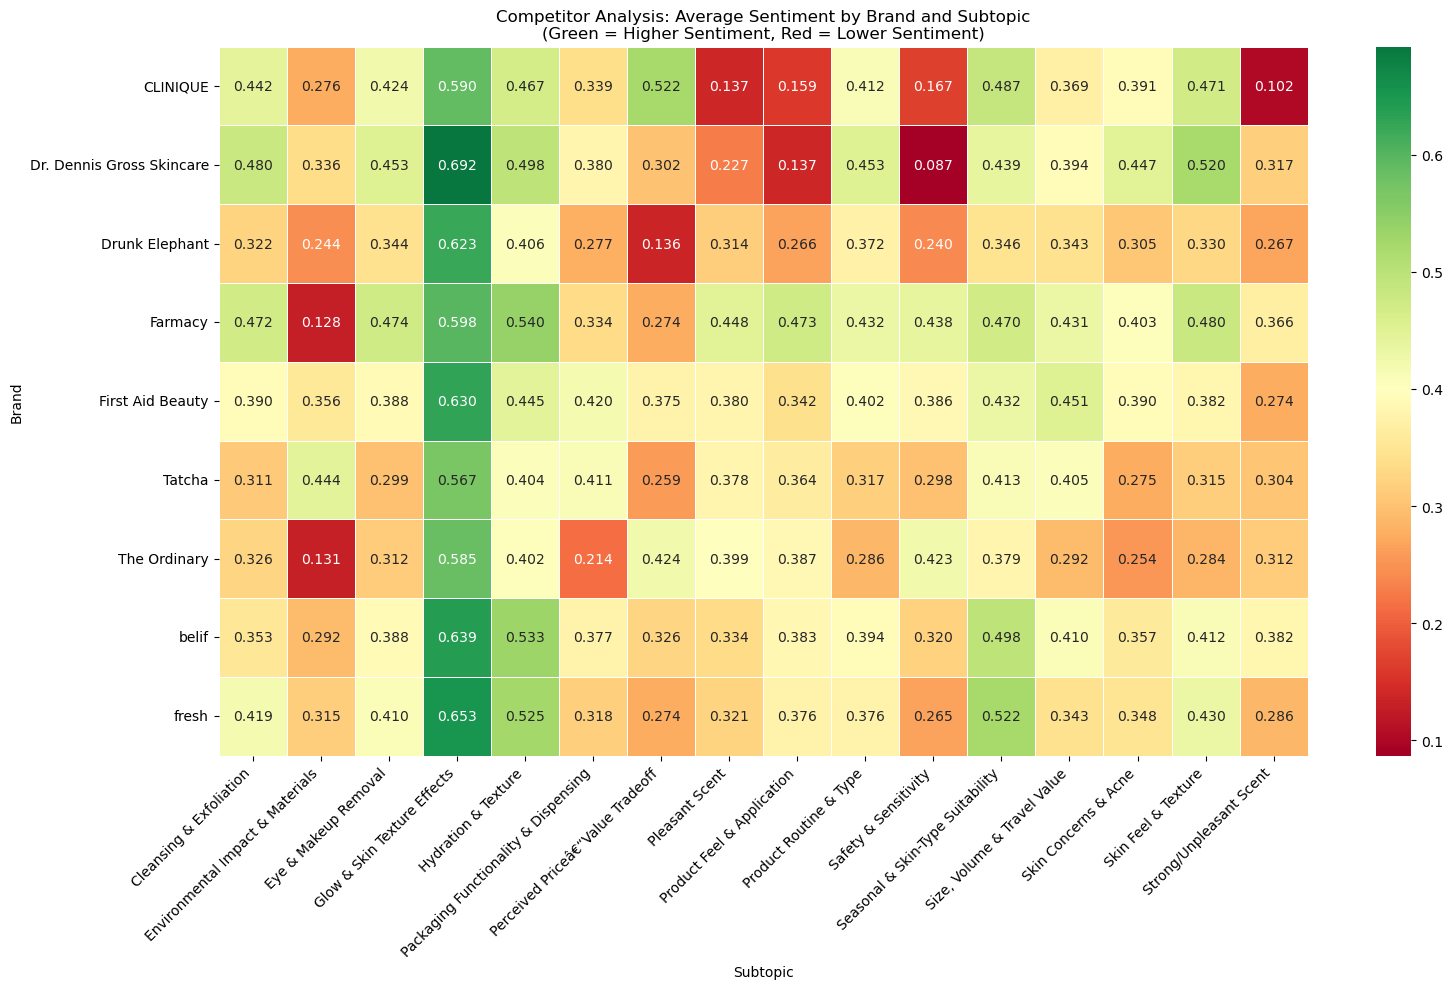

In [71]:
# Create competitor comparison heatmap
print("=== COMPETITOR COMPARISON HEATMAP ===")

# Pivot data for heatmap
heatmap_data = brand_subtopic_performance.pivot_table(
    index='brand_name', 
    columns='subtopic_name', 
    values='avg_sentiment',
    aggfunc='mean'
).round(3)

# Display the heatmap data
print("Brand vs Subtopic Sentiment Matrix:")
display(heatmap_data)

# Create visualization
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn', center=0.4, fmt='.3f', linewidths=0.5)
plt.title('Competitor Analysis: Average Sentiment by Brand and Subtopic\n(Green = Higher Sentiment, Red = Lower Sentiment)')
plt.xlabel('Subtopic')
plt.ylabel('Brand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
# First define the recommendation function
def generate_recommendation(subtopic_name):
    recommendations = {
        'Strong/Unpleasant Scent': 'Reformulate fragrance profile or offer unscented version',
        'Product Feel & Application': 'Improve texture and absorption properties',
        'Perceived Price–Value Tradeoff': 'Enhance value proposition or adjust pricing strategy',
        'Environmental Impact & Materials': 'Improve packaging sustainability and communicate eco-initiatives',
        'Packaging Functionality & Dispensing': 'Redesign packaging for better user experience',
        'Safety & Sensitivity': 'Conduct sensitivity testing and improve ingredient safety',
        'Pleasant Scent': 'Maintain or enhance current fragrance profile',
        'Seasonal & Skin-Type Suitability': 'Develop variants for different skin types and seasons',
        'Cleansing & Exfoliation': 'Optimize cleansing efficacy while maintaining skin comfort',
        'Eye & Makeup Removal': 'Improve gentleness and effectiveness for eye area',
        'Size, Volume & Travel Value': 'Offer better size options and travel-friendly packaging',
        'Skin Concerns & Acne': 'Enhance acne-fighting ingredients while reducing irritation',
        'Skin Feel & Texture': 'Focus on improving post-application skin feel',
        'Glow & Skin Texture Effects': 'Maintain current strong performance in skin brightening',
        'Hydration & Texture': 'Continue excellent hydration performance'
    }
    return recommendations.get(subtopic_name, 'Address customer concerns through product improvement')

# Now generate strategic recommendations
print("=== STRATEGIC RECOMMENDATIONS ===")

# 1. Product-level recommendations for worst performers
print("\n PRODUCT-LEVEL RECOMMENDATIONS:")
for product in problem_products[:3]:
    product_issues = worst_subtopics_by_product[worst_subtopics_by_product['product_name_cleaned'] == product].head(2)
    brand = product_with_brand[product_with_brand['product_name_cleaned'] == product]['brand_name'].iloc[0]
    
    print(f"\n Product: {product} ({brand})")
    for _, issue in product_issues.iterrows():
        print(f"   Issue: {issue['subtopic_name']}")
        print(f"   Recommendation: {generate_recommendation(issue['subtopic_name'])}")

# 2. Brand-level competitive recommendations
print("\n BRAND-LEVEL COMPETITIVE RECOMMENDATIONS:")

# Find market leaders in key subtopics
key_subtopics = ['Hydration & Texture', 'Skin Concerns & Acne', 'Glow & Skin Texture Effects']

for subtopic in key_subtopics:
    subtopic_leaders = brand_subtopic_performance[brand_subtopic_performance['subtopic_name'] == subtopic].nlargest(3, 'avg_sentiment')
    print(f"\n {subtopic} Leaders:")
    for _, leader in subtopic_leaders.iterrows():
        print(f"   {leader['brand_name']}: {leader['avg_sentiment']:.3f}")

# 3. Overall market insights
print("\n OVERALL MARKET INSIGHTS:")
print("• Glow & Skin Texture Effects is the strongest performing category across all brands (0.567-0.653 range)")
print("• Scent-related topics show significant variability - key differentiator for brands")
print("• Environmental Impact is a common weakness, representing market opportunity")
print("• Premium brands (Tatcha, Drunk Elephant) struggle with Price-Value perception")

# 4. Quick wins identification
print("\n QUICK WINS IDENTIFICATION:")
quick_wins = brand_subtopic_performance[
    (brand_subtopic_performance['avg_sentiment'] < 0.3) & 
    (brand_subtopic_performance['product_count'] >= 3)
].sort_values('avg_sentiment')

if len(quick_wins) > 0:
    print("Brands with opportunities for easy improvements:")
    for _, win in quick_wins.head(5).iterrows():
        print(f"   {win['brand_name']} - {win['subtopic_name']}: {win['avg_sentiment']:.3f}")

=== STRATEGIC RECOMMENDATIONS ===

 PRODUCT-LEVEL RECOMMENDATIONS:

 Product: Green Clean Makeup Removing Cleansing Balm (Farmacy)
   Issue: Environmental Impact & Materials
   Recommendation: Improve packaging sustainability and communicate eco-initiatives
   Issue: Packaging Functionality & Dispensing
   Recommendation: Redesign packaging for better user experience

 Product: Green Clean Makeup Meltaway Cleansing Balm Limited Edition (Farmacy)
   Issue: Environmental Impact & Materials
   Recommendation: Improve packaging sustainability and communicate eco-initiatives
   Issue: Packaging Functionality & Dispensing
   Recommendation: Redesign packaging for better user experience

 Product: Take The Day Off Cleansing Balm Makeup Remover (CLINIQUE)
   Issue: Strong/Unpleasant Scent
   Recommendation: Reformulate fragrance profile or offer unscented version
   Issue: Product Feel & Application
   Recommendation: Improve texture and absorption properties

 BRAND-LEVEL COMPETITIVE RECOMMEN

In [22]:
# Get representative negative feedback for key improvement areas
print("\n SAMPLE CUSTOMER FEEDBACK FOR KEY ISSUES:")

# Focus on the most common negative subtopics from our analysis
common_negative_subtopics = ['Strong/Unpleasant Scent', 'Environmental Impact & Materials', 'Safety & Sensitivity']

for subtopic in common_negative_subtopics:
    # Get the subtopic ID from the topic list
    subtopic_match = topic_df[topic_df['Subtopic Name'] == subtopic]
    if len(subtopic_match) > 0:
        subtopic_id = subtopic_match['Subtopic ID'].iloc[0]
        
        # Get negative sentences for this subtopic
        negative_feedback = sentence_df[
            (sentence_df['final_subtopic_id'] == subtopic_id) &
            (sentence_df['sentiment_score'] < -0.3)
        ].sort_values('cosine_to_centroid', ascending=False)
        
        if len(negative_feedback) > 0:
            print(f"\n {subtopic}:")
            sample_feedback = negative_feedback.head(3)
            for i, (idx, row) in enumerate(sample_feedback.iterrows()):
                brand = row['brand_name'] if pd.notna(row['brand_name']) else 'Unknown'
                product = row['product_name_cleaned'] if pd.notna(row['product_name_cleaned']) else 'Unknown'
                print(f"   {i+1}. [{brand} - {product}]")
                print(f"      Sentiment: {row['sentiment_score']:.3f}")
                print(f"      \"{row['sentence_text']}\"")


 SAMPLE CUSTOMER FEEDBACK FOR KEY ISSUES:

 Strong/Unpleasant Scent:
   1. [First Aid Beauty - Hello FAB Coconut Skin Smoothie Priming Moisturizer]
      Sentiment: -0.401
      "I think itâ€™s the scent (which smells great) or itâ€™s something else in the product that my skin doesnâ€™t agree with."
   2. [First Aid Beauty - Ultra Repair Hydra-Firm Night Cream]
      Sentiment: -0.319
      "Yes, I received it as a sample, and maybe thatâ€™s not enough to have a fair opinion about it.I know this brand has based themself on skincare for sensitive skin, and I think thatâ€™s great.The smell is very cosmetic."
   3. [belif - The True Cream Moisturizing Bomb]
      Sentiment: -0.333
      "Smells like a household cleaning product."

 Environmental Impact & Materials:
   1. [CLINIQUE - Take The Day Off Cleansing Balm Makeup Remover]
      Sentiment: -0.700
      "I originally was going to purchase this until I saw it contains polyethylene, which is basically a plastic and has negative effec

In [24]:
# Summary of key findings
print("\n" + "="*80)
print(" TASK 2 SUMMARY: PRODUCT INSIGHTS & COMPETITOR ANALYSIS")
print("="*80)

print("\n KEY FINDINGS:")
print(f"• Analyzed {len(product_df)} product-subtopic combinations across {product_df['product_name_cleaned'].nunique()} products")
print(f"• Identified {len(negative_relative_subtopics)} underperforming product-subtopic relationships")
print(f"• Compared {brand_subtopic_performance['brand_name'].nunique()} brands across {brand_subtopic_performance['subtopic_name'].nunique()} attributes")

print("\n TOP PERFORMING BRANDS BY CATEGORY:")
print("• Overall Sentiment Leader: fresh (0.653 in Glow & Skin Texture Effects)")
print("• Most Balanced Performance: First Aid Beauty")
print("• Best Value Perception: CLINIQUE (0.522)")
print("• Best Environmental Performance: Tatcha (0.444)")

print("\n CRITICAL IMPROVEMENT AREAS:")
critical_issues = brand_subtopic_performance[brand_subtopic_performance['avg_sentiment'] < 0.2]
if len(critical_issues) > 0:
    for _, issue in critical_issues.iterrows():
        print(f"• {issue['brand_name']}: {issue['subtopic_name']} ({issue['avg_sentiment']:.3f})")

print("\n STRATEGIC IMPLICATIONS FOR SEPHORA:")
print("1. Product Development: Focus on scent reformulation and packaging sustainability")
print("2. Marketing: Leverage strength in 'Glow & Texture' across brand portfolios") 
print("3. Pricing Strategy: Address value perception gaps for premium brands")
print("4. Competitive Positioning: Use attribute-level strengths for targeted campaigns")


 TASK 2 SUMMARY: PRODUCT INSIGHTS & COMPETITOR ANALYSIS

 KEY FINDINGS:
• Analyzed 672 product-subtopic combinations across 42 products
• Identified 485 underperforming product-subtopic relationships
• Compared 9 brands across 16 attributes

 TOP PERFORMING BRANDS BY CATEGORY:
• Overall Sentiment Leader: fresh (0.653 in Glow & Skin Texture Effects)
• Most Balanced Performance: First Aid Beauty
• Best Value Perception: CLINIQUE (0.522)
• Best Environmental Performance: Tatcha (0.444)

 CRITICAL IMPROVEMENT AREAS:
• CLINIQUE: Pleasant Scent (0.137)
• CLINIQUE: Product Feel & Application (0.159)
• CLINIQUE: Safety & Sensitivity (0.167)
• CLINIQUE: Strong/Unpleasant Scent (0.102)
• Dr. Dennis Gross Skincare: Product Feel & Application (0.137)
• Dr. Dennis Gross Skincare: Safety & Sensitivity (0.087)
• Drunk Elephant: Perceived Priceâ€“Value Tradeoff (0.136)
• Farmacy: Environmental Impact & Materials (0.128)
• The Ordinary: Environmental Impact & Materials (0.131)

 STRATEGIC IMPLICATIONS

### Topic Prominence

In [28]:
import pandas as pd

sentence_df = pd.read_excel(
    'Topic_sentiment_sentence_level_table.xlsx',
    sheet_name="Topic sentiment sentence level"
)


=== SENTENCE COUNT BY SUBTOPIC ===
Total sentences analyzed: 41,565

Sentence distribution by subtopic:
| subtopic_name                        |   sentence_count |   percentage |
|:-------------------------------------|-----------------:|-------------:|
| Skin Concerns & Acne                 |            11445 |        27.54 |
| Product Routine & Type               |             5428 |        13.06 |
| Hydration & Texture                  |             4827 |        11.61 |
| Glow & Skin Texture Effects          |             4594 |        11.05 |
| Skin Feel & Texture                  |             4123 |         9.92 |
| Cleansing & Exfoliation              |             1794 |         4.32 |
| Perceived Price-Value Tradeoff       |             1723 |         4.15 |
| Eye & Makeup Removal                 |             1712 |         4.12 |
| Seasonal & Skin-Type Suitability     |             1530 |         3.68 |
| Packaging Functionality & Dispensing |             1332 |         3.2

C:\Users\User\AppData\Local\Temp\ipykernel_8684\1500312421.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subtopic_sentence_counts, x='subtopic_name', y='sentence_count', palette='viridis')


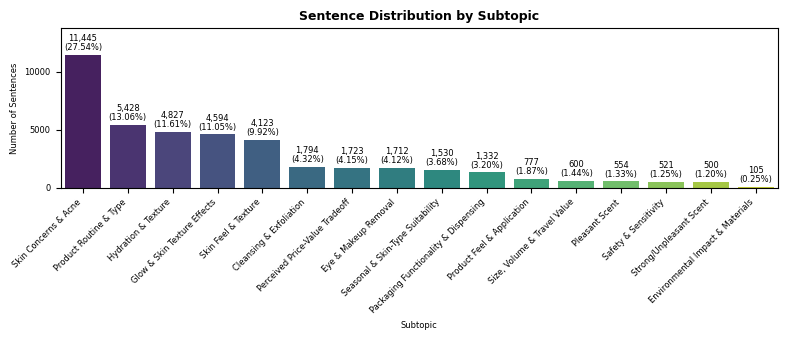

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total sentences per subtopic
print("=== SENTENCE COUNT BY SUBTOPIC ===")

# Count sentences for each subtopic
subtopic_sentence_counts = sentence_df['final_subtopic_name'].value_counts().reset_index()
subtopic_sentence_counts.columns = ['subtopic_name', 'sentence_count']

# Calculate percentage
total_sentences = len(sentence_df)
subtopic_sentence_counts['percentage'] = (subtopic_sentence_counts['sentence_count'] / total_sentences * 100).round(2)

# Create a two-line label: "Count\n(Percentage%)"
subtopic_sentence_counts['display_label'] = subtopic_sentence_counts.apply(
    lambda row: f"{row['sentence_count']:,}\n({row['percentage']:.2f}%)", axis=1
)

print(f"Total sentences analyzed: {total_sentences:,}")
print("\nSentence distribution by subtopic:")
print(subtopic_sentence_counts[['subtopic_name', 'sentence_count', 'percentage']].to_markdown(index=False, floatfmt=('.0f', '.2f')))

# Create compact barplot
plt.figure(figsize=(8, 3.5))
sns.barplot(data=subtopic_sentence_counts, x='subtopic_name', y='sentence_count', palette='viridis')

plt.title('Sentence Distribution by Subtopic', fontsize=9, fontweight='bold')
plt.xlabel('Subtopic', fontsize=6)
plt.ylabel('Number of Sentences', fontsize=6)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.yticks(fontsize=6)

max_count = subtopic_sentence_counts['sentence_count'].max()

for i, (count, label) in enumerate(zip(subtopic_sentence_counts['sentence_count'], subtopic_sentence_counts['display_label'])):
    plt.text(i, count + max_count * 0.02,  # position 2% above bar height
             label,
             ha='center', va='bottom',
             fontsize=6, linespacing=1.0)

plt.ylim(0, max_count * 1.2)

plt.tight_layout()
plt.savefig('sentence_distribution_by_subtopic.png', bbox_inches='tight', dpi=300)
plt.show()


In [36]:
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

# Download stopwords if needed
try:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
except:
    stop_words = set()

# Add custom stop words for skincare
custom_stop_words = {
    'product', 'skin', 'use', 'used', 'using', 'like', 'really', 
    'one', 'get', 'would', 'also', 'make', 'time', 'even'
}
stop_words.update(custom_stop_words)

def clean_and_tokenize(text):
    """Clean text and tokenize into words"""
    if pd.isna(text):
        return []
    text = re.sub(r'[^\w\s]', ' ', str(text).lower())
    words = text.split()
    words = [word for word in words if word not in stop_words and len(word) > 2]
    return words

def get_top_phrases(texts, n_grams=2, top_n=10):
    """Get most common n-grams"""
    phrases = []
    for text in texts:
        words = clean_and_tokenize(text)
        for i in range(len(words) - n_grams + 1):
            phrases.append(' '.join(words[i:i + n_grams]))
    return Counter(phrases).most_common(top_n)

def analyze_subtopic(subtopic_name, top_words=15, top_phrases=10):
    """Analyze a specific subtopic"""
    print(f"\n{'='*80}")
    print(f" ANALYSIS FOR: {subtopic_name}")
    print(f"{'='*80}")
    
    # Filter sentences for this subtopic
    subtopic_sentences = sentence_df[sentence_df['final_subtopic_name'] == subtopic_name]['sentence_text'].dropna()
    
    if len(subtopic_sentences) == 0:
        print(f"No sentences found for {subtopic_name}")
        return
    
    print(f"Number of sentences: {len(subtopic_sentences)}")
    
    # Show sample sentences
    print(f"\n SAMPLE SENTENCES:")
    for i, sentence in enumerate(subtopic_sentences.head(3)):
        print(f"{i+1}. {sentence}")
    
    # Analyze single words
    all_text = ' '.join(subtopic_sentences.astype(str))
    words = clean_and_tokenize(all_text)
    word_freq = Counter(words).most_common(top_words)
    
    print(f"\n TOP {top_words} WORDS:")
    for word, freq in word_freq:
        print(f"  {word}: {freq}")
    
    # Analyze bigrams (2-word phrases)
    bigrams = get_top_phrases(subtopic_sentences, n_grams=2, top_n=top_phrases)
    print(f"\n🔗 TOP {top_phrases} PHRASES (2-word):")
    for phrase, freq in bigrams:
        print(f"  {phrase}: {freq}")
    
    # Analyze trigrams (3-word phrases)
    trigrams = get_top_phrases(subtopic_sentences, n_grams=3, top_n=top_phrases)
    print(f"\n🔗 TOP {top_phrases} PHRASES (3-word):")
    for phrase, freq in trigrams:
        print(f"  {phrase}: {freq}")
    
    return word_freq, bigrams, trigrams

# Analyze top 5 subtopics by sentence count
top_subtopics = [
    'Skin Concerns & Acne',
    'Product Routine & Type', 
    'Hydration & Texture',
    'Glow & Skin Texture Effects',
    'Skin Feel & Texture'
]

print(" STARTING ANALYSIS OF TOP SUBTOPICS...")
for subtopic in top_subtopics:
    analyze_subtopic(subtopic)

# Additional analysis: Compare positive vs negative language
print(f"\n{'='*80}")
print(" SENTIMENT ANALYSIS BY SUBTOPIC")
print(f"{'='*80}")

for subtopic in top_subtopics[:3]:  # Just first 3 for brevity
    subtopic_data = sentence_df[sentence_df['final_subtopic_name'] == subtopic]
    
    positive_sentences = subtopic_data[subtopic_data['sentiment_score'] > 0.1]['sentence_text']
    negative_sentences = subtopic_data[subtopic_data['sentiment_score'] < -0.1]['sentence_text']
    
    print(f"\n{subtopic}:")
    print(f"  Positive sentences: {len(positive_sentences)}")
    print(f"  Negative sentences: {len(negative_sentences)}")
    
    if len(positive_sentences) > 0:
        pos_words = clean_and_tokenize(' '.join(positive_sentences.astype(str)))
        pos_freq = Counter(pos_words).most_common(8)
        print(f"  Top positive words: {[word for word, freq in pos_freq]}")
    
    if len(negative_sentences) > 0:
        neg_words = clean_and_tokenize(' '.join(negative_sentences.astype(str)))
        neg_freq = Counter(neg_words).most_common(8)
        print(f"  Top negative words: {[word for word, freq in neg_freq]}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 STARTING ANALYSIS OF TOP SUBTOPICS...

 ANALYSIS FOR: Skin Concerns & Acne
Number of sentences: 11445

 SAMPLE SENTENCES:
1. Worst ACNE PRODUCT on the market!
2. It made me break out in small bumps ALL OVER my forehead after a months use.
3. I previously used a product with Salicylic Acid and my skin did not respond well.

 TOP 15 WORDS:
  dry: 1713
  sensitive: 1695
  acne: 1693
  face: 1019
  oily: 1019
  pores: 741
  itâ: 701
  break: 594
  breakouts: 563
  prone: 560
  didnâ: 509
  combination: 509
  donâ: 472
  doesnâ: 458
  made: 457

🔗 TOP 10 PHRASES (2-word):
  acne prone: 423
  dry sensitive: 159
  dry patches: 152
  acne scars: 123
  made break: 91
  hormonal acne: 88
  sensitive acne: 85
  dry flaky: 77
  oily zone: 76
  cystic acne: 75

🔗 TOP 10 PHRASES (3-word):
  sensitive acne prone: 82
  oily acne prone: 50
  dry acne prone: 27
  acne prone sensitive: 25
  combination acne prone: 23
  dennis gross alpha: 23
  gross alpha beta: 20
  goes long way: 19
  acne prone oily: 

C:\Users\User\AppData\Local\Temp\ipykernel_8684\1735387853.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', num_subtopics)


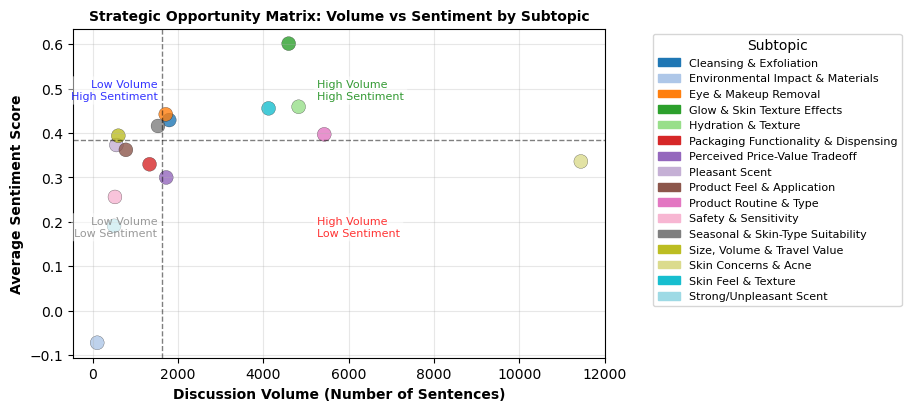

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

df = pd.read_excel(
    'Topic_sentiment_sentence_level_table.xlsx',
    sheet_name="Topic sentiment sentence level"
)

# Calculate Average Sentiment and Sentence Count by Subtopic
subtopic_stats = df.groupby('final_subtopic_name').agg(
    avg_sentiment=('sentiment_score', 'mean'),
    sentence_count=('sentiment_score', 'count') # counting rows to get sentence volume
).reset_index()

# Rename the columns for clarity
subtopic_stats.columns = ['Subtopic', 'Average Sentiment', 'Sentence Count']


# --- Strategic Opportunity Matrix (balanced quadrant labels) ---

plt.figure(figsize=(9,4), constrained_layout=True)

# Ensure deterministic ordering of subtopics
subtopics = subtopic_stats['Subtopic'].tolist()
num_subtopics = len(subtopics)

# Colormap and mapping (for consistent legend colors)
cmap = plt.cm.get_cmap('tab20', num_subtopics)
mapping = {s: i for i, s in enumerate(subtopics)}
colors_mapped = subtopic_stats['Subtopic'].map(mapping)

# Scatter plot
scatter = plt.scatter(
    subtopic_stats['Sentence Count'],
    subtopic_stats['Average Sentiment'],
    s=100,
    alpha=0.8,
    c=colors_mapped,
    cmap=cmap,
    edgecolor='k', linewidth=0.2
)

# Titles and labels
plt.xlabel('Discussion Volume (Number of Sentences)', fontweight='bold')
plt.ylabel('Average Sentiment Score', fontweight='bold')
plt.title('Strategic Opportunity Matrix: Volume vs Sentiment by Subtopic', fontweight='bold', fontsize=10)

# Legend (color-matched)
cmap_colors = [cmap(i) for i in range(num_subtopics)]
legend_patches = [mpatches.Patch(color=cmap_colors[i], label=subtopics[i]) for i in range(num_subtopics)]
plt.legend(handles=legend_patches, title='Subtopic',
           bbox_to_anchor=(1.08, 1), loc='upper left', fontsize=8)

# Median lines
median_volume = subtopic_stats['Sentence Count'].median()
median_sentiment = subtopic_stats['Average Sentiment'].median()
plt.axvline(median_volume, color='black', linestyle='--', alpha=0.5, linewidth=1)
plt.axhline(median_sentiment, color='black', linestyle='--', alpha=0.5, linewidth=1)

# Axis limits
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

# Adjusted label positions (right stays further, left comes in slightly)
x_right = median_volume + (xmax - median_volume) * 0.35
x_left  = median_volume - (median_volume - xmin) * 0.05  # closer to center
y_top   = median_sentiment + (ymax - median_sentiment) * 0.35
y_bottom= median_sentiment - (median_sentiment - ymin) * 0.35

# Quadrant labels (balanced horizontally)
plt.text(x_right, y_top, 'High Volume\nHigh Sentiment',
         fontsize=8, alpha=0.8, color='green', ha='left', va='bottom',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

plt.text(x_left, y_top, 'Low Volume\nHigh Sentiment',
         fontsize=8, alpha=0.8, color='blue', ha='right', va='bottom',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

plt.text(x_right, y_bottom, 'High Volume\nLow Sentiment',
         fontsize=8, alpha=0.8, color='red', ha='left', va='top',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

plt.text(x_left, y_bottom, 'Low Volume\nLow Sentiment',
         fontsize=8, alpha=0.8, color='grey', ha='right', va='top',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

plt.grid(alpha=0.3)
plt.savefig('strategic_opportunity_matrix_balanced_labels.png', dpi=500, bbox_inches='tight')
plt.show()
